Ödevi tamamlamak için aşağıdaki soruların cevabını içeren Jupyter notebook'u sisteme yükleyiniz:

Değişik eps ve min_samples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz.

eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, min_samples değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_heart = pd.read_csv("heart.csv")

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df_heart.iloc[:, :13]
y = df_heart.iloc[:, 13]

X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
#standardizasyon

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
dbscan_cluster = DBSCAN(eps=1,min_samples=1)
clusters = dbscan_cluster.fit_predict(X_std)

In [6]:
len(np.unique(clusters))

293

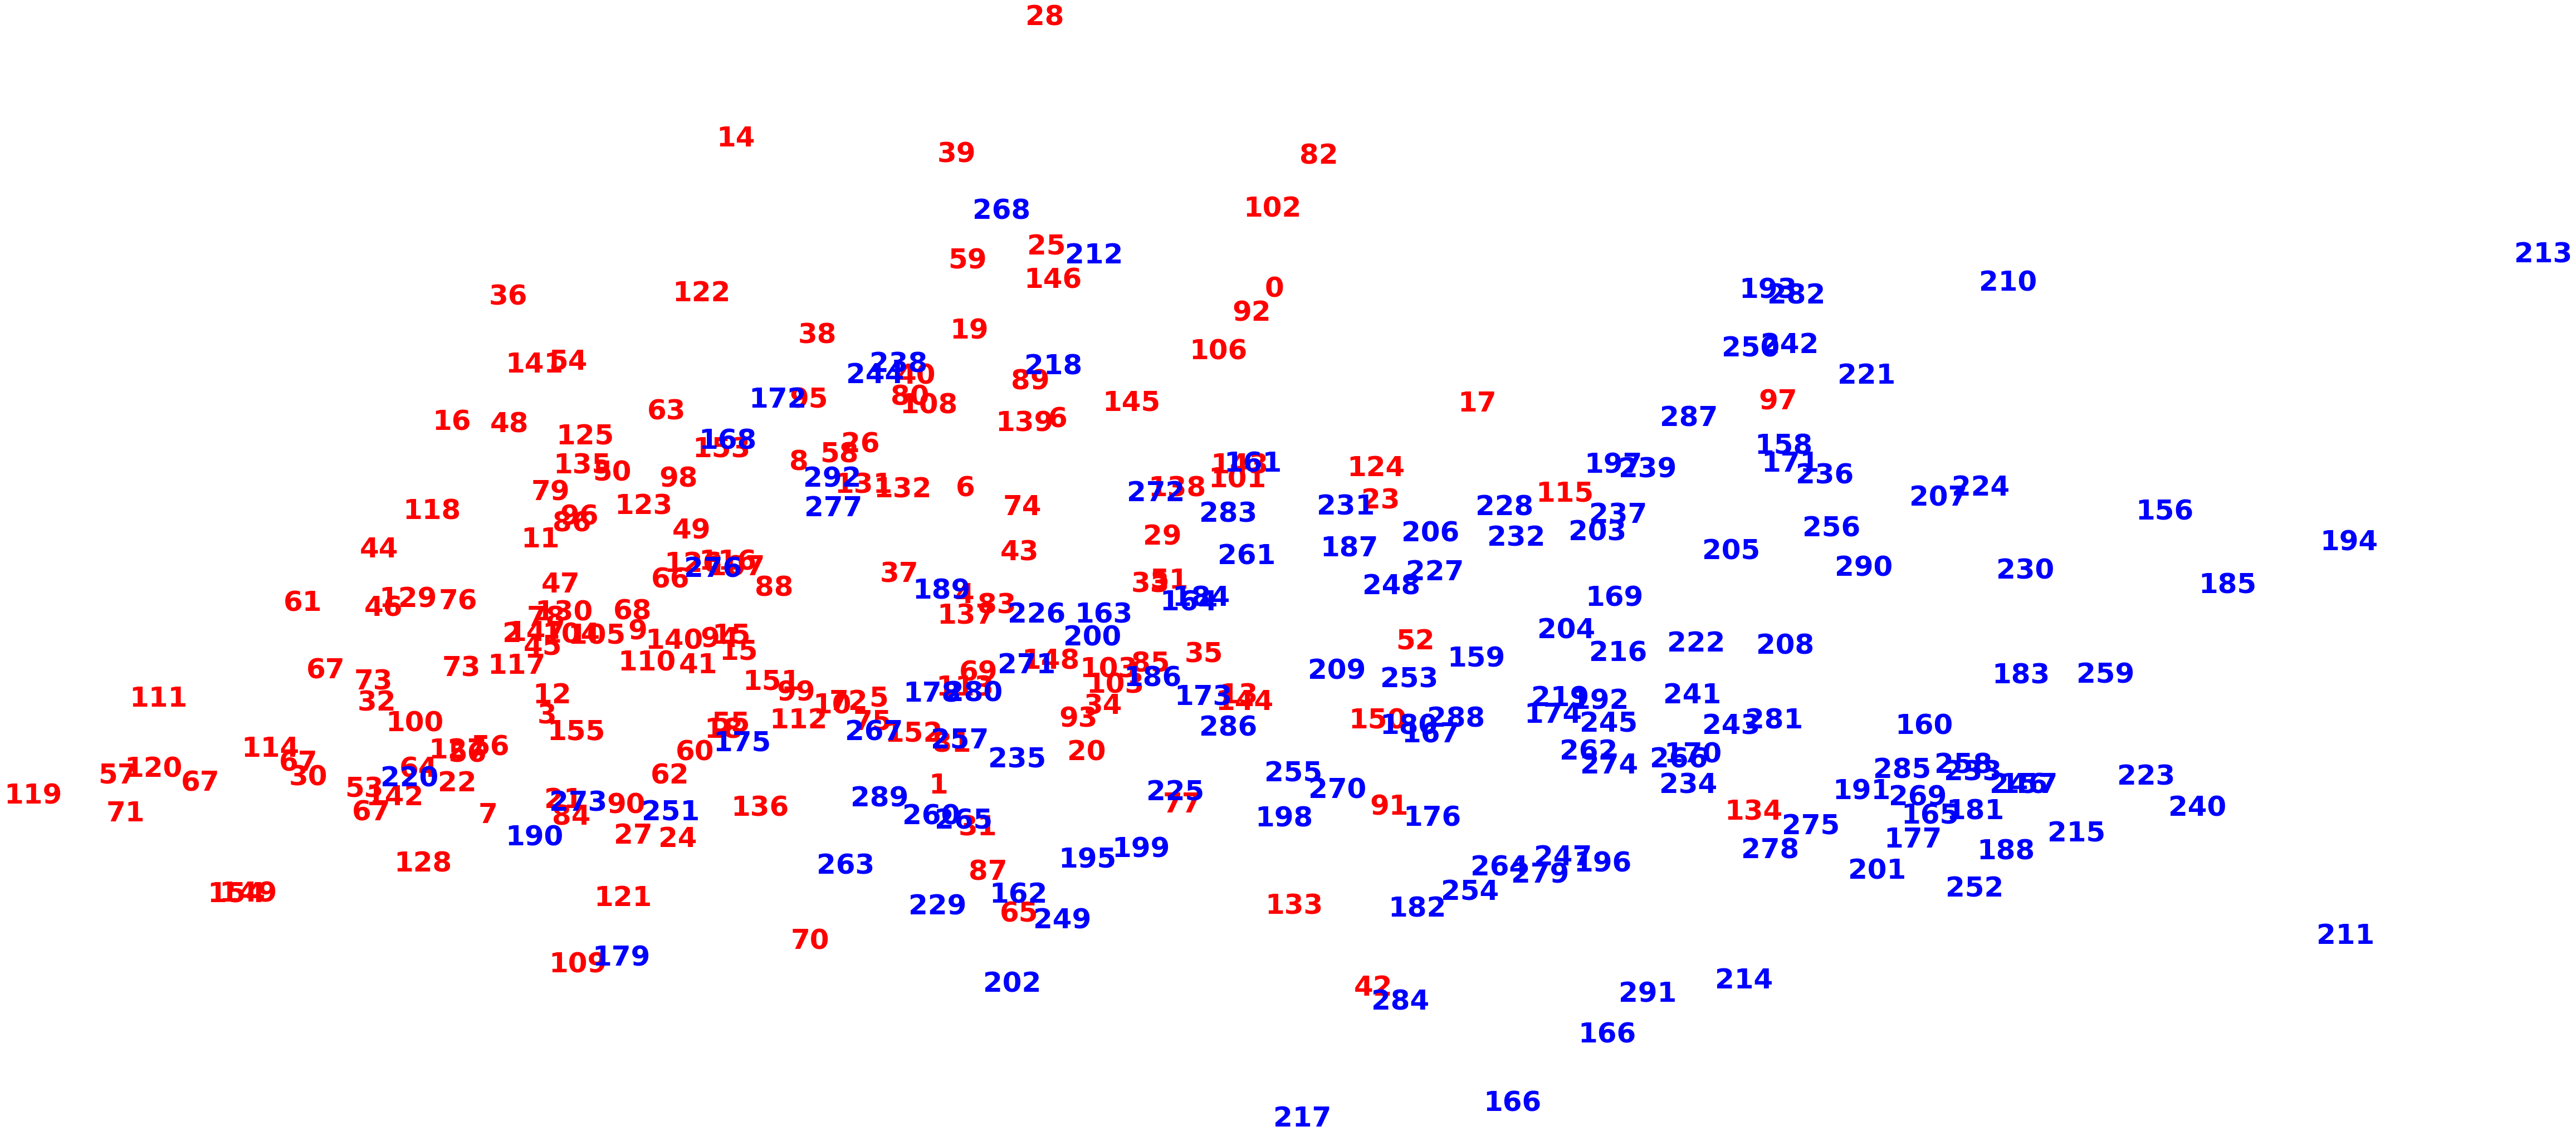

In [7]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [8]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.0005630036745304687


In [9]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: 0.029961327114175956


min_samples degeri arttırıldığında değişen küme sayılarına bakalım:

In [10]:
for i in range(1,6):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    clusters = dbscan_cluster.fit_predict(X_std)
    print("min_samples={} iken küme sayısı: {}".format(i, len(np.unique(clusters))))

min_samples=1 iken küme sayısı: 293
min_samples=2 iken küme sayısı: 9
min_samples=3 iken küme sayısı: 2
min_samples=4 iken küme sayısı: 2
min_samples=5 iken küme sayısı: 1


epsilon degeri arttırıldığında değişen küme sayılarına bakalım:

In [11]:
for i in range(1,12):
    dbscan_cluster = DBSCAN(eps=i*0.5, min_samples=1,metric="euclidean")
    clusters = dbscan_cluster.fit_predict(X_std)
    print("epsilon değeri {} iken küme sayısı: {}".format(i*0.5,len(np.unique(clusters))))

epsilon değeri 0.5 iken küme sayısı: 300
epsilon değeri 1.0 iken küme sayısı: 293
epsilon değeri 1.5 iken küme sayısı: 254
epsilon değeri 2.0 iken küme sayısı: 182
epsilon değeri 2.5 iken küme sayısı: 90
epsilon değeri 3.0 iken küme sayısı: 41
epsilon değeri 3.5 iken küme sayısı: 14
epsilon değeri 4.0 iken küme sayısı: 6
epsilon değeri 4.5 iken küme sayısı: 2
epsilon değeri 5.0 iken küme sayısı: 1
epsilon değeri 5.5 iken küme sayısı: 1


şimdi de bu değişimleri grafik üzerinde görelim:

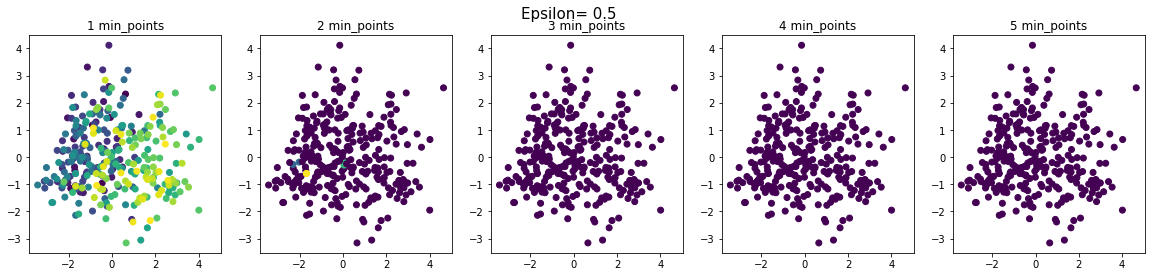

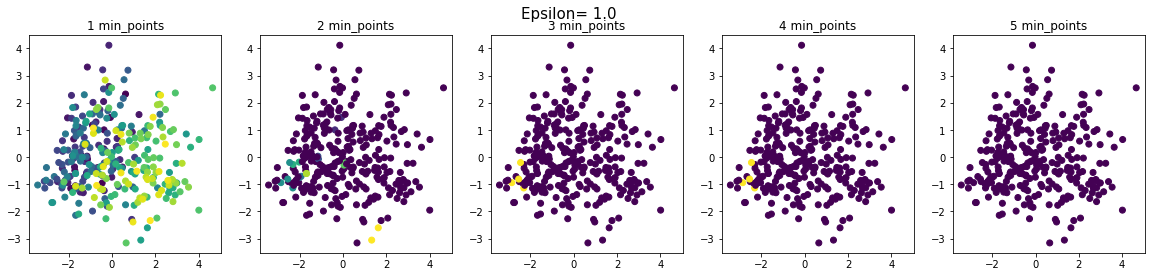

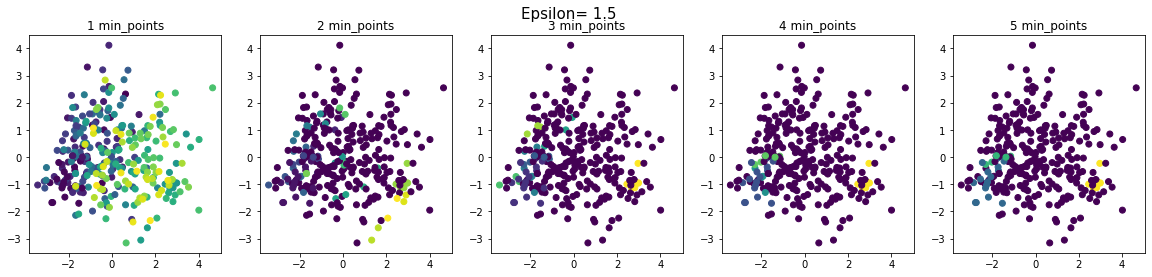

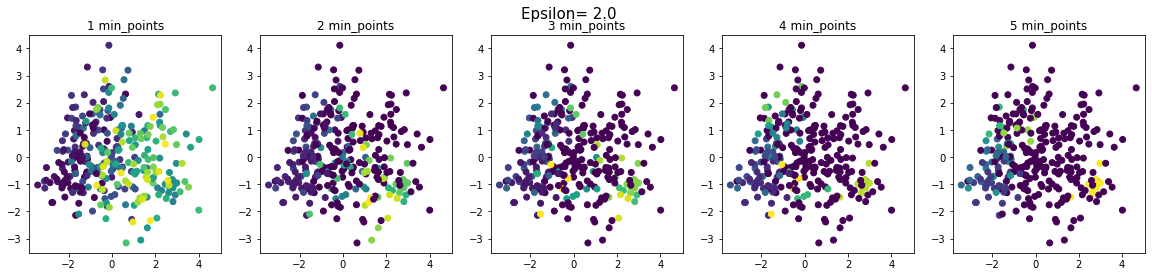

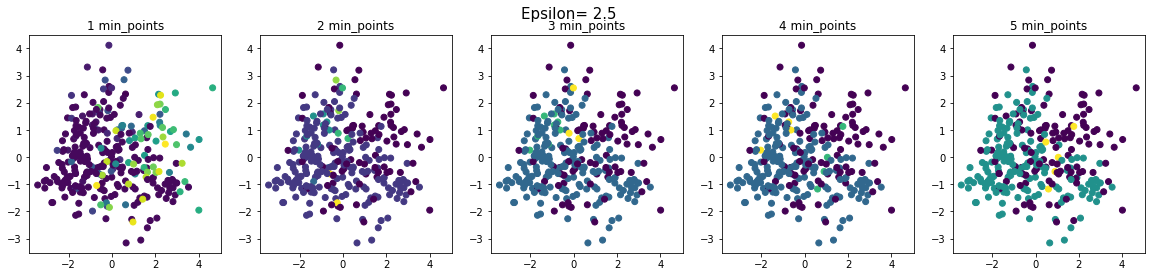

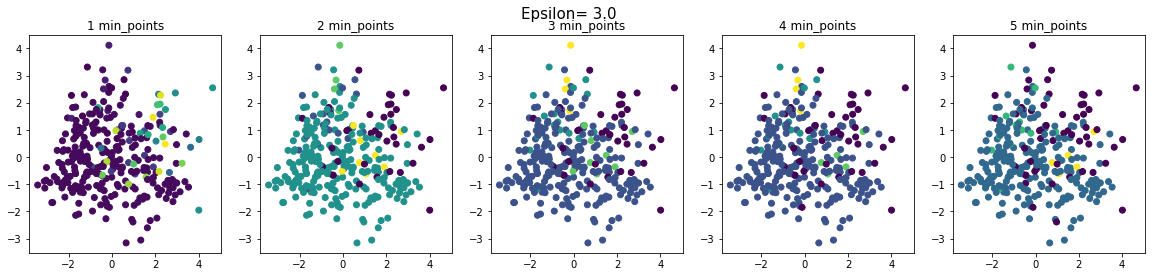

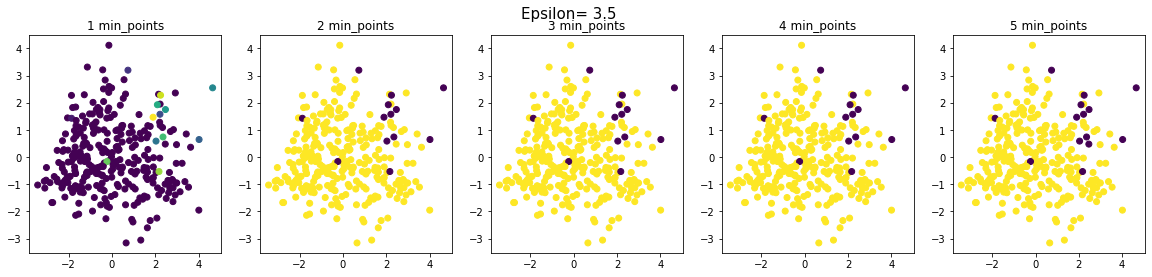

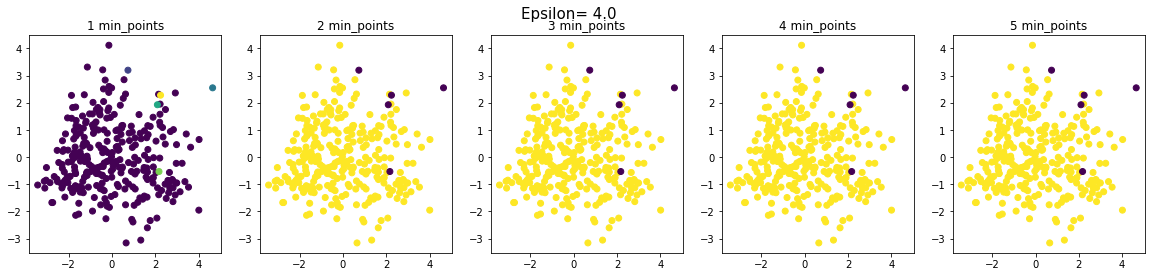

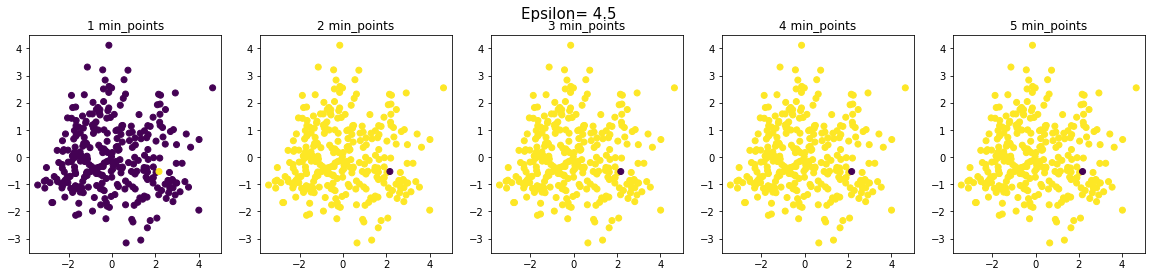

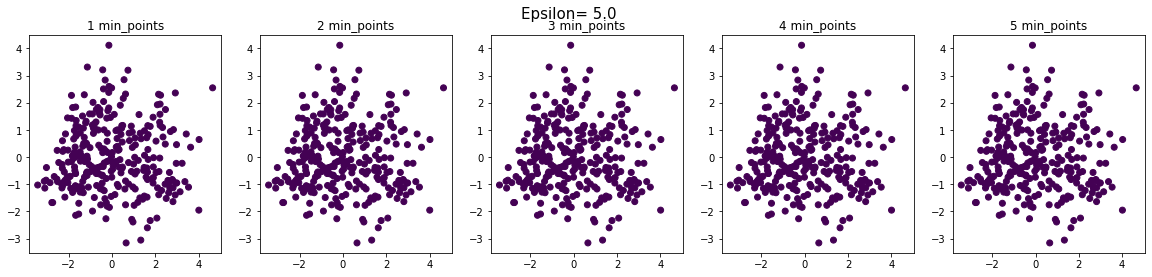

In [12]:
for i in range(1,11):
    f,subp=plt.subplots(1,5,figsize=(20,4))
    
    for j in range(1,6):
        dbscan_cluster=DBSCAN(eps=i*0.5, min_samples=j)
        kümeler=dbscan_cluster.fit_predict(X_std)
        
        subp[j-1].scatter(pca.T[0], pca.T[1], c=kümeler)
        subp[j-1].set_title("{} min_points".format(j))

    plt.suptitle("Epsilon= {}".format(i*0.5), fontsize=15)
    plt.tight_layout
    plt.show()

sonuç olarak min_samples ve epsilon değerleri arttıkça küme sayısının azaldığını söyleyebiliriz.